# Week 9, Part 1: Advanced Regression, Basic Clasification

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as gbr
import os

These csv files are from my capstone project but I have done nothing with them. I merely ran my program and got the needed data last night. 

In [7]:
neat = pd.read_csv('NEAT-1603168215.csv')

hn = pd.read_csv('HyperNEAT-1603168239.csv')

**neat** - the NEAT (**N**euro**E**volutionary of **A**ugmenting **T**opologies) implementation of the program

**hn** - the HyperNEAT (**Hyper N**euro**E**volutionary of **A**ugmenting **T**opologies) implemenation of the program

In [8]:
neat

,Generation,Average,Maximum
0,0,1081,2760
1,1,3143,5160
2,2,3017,5020
3,3,3060,5080
4,4,3497,5250
5,5,3218,5210
6,6,3405,5230
7,7,3231,5190
8,8,3464,5180
9,9,3304,5200


In [9]:
hn

,Generation,Average,Maximum
0,0,334,2510
1,1,1032,5860
2,2,1221,2490
3,3,1083,2500
4,4,1424,2670
5,5,993,2710
6,6,1454,6120
7,7,1891,2740
8,8,1594,2660
9,9,1590,2650


These are of different sizes because I ran them for the same amount of time and not the same number of generations. This was done this way because HyperNEAT is suppose to get higher scores quicker when NEAT.

Text(0.5, 1.0, 'NEAT generation v maximum score')

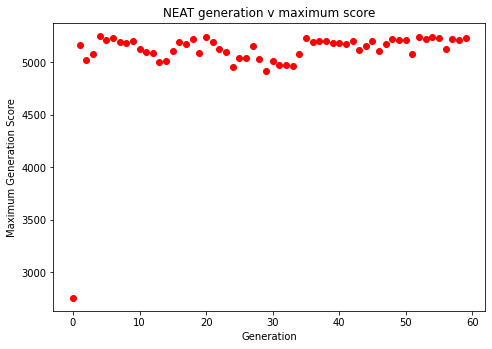

In [10]:
fig = plt.figure()
scatter = fig.add_axes([0,0,1,1])
scatter.scatter(neat['Generation'], neat['Maximum'], color='r')
scatter.set_xlabel('Generation')
scatter.set_ylabel('Maximum Generation Score')
scatter.set_title("NEAT generation v maximum score")

Figure 1: A scatter plot between the Generation and the Maximum score reach for that generation for the NEAT algorithm.

Text(0.5, 1.0, 'HyperNEAT generation v maximum score')

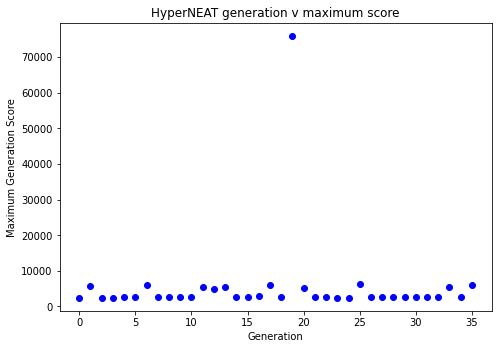

In [11]:
fig = plt.figure()
scatter = fig.add_axes([0,0,1,1])
scatter.scatter(hn['Generation'], hn['Maximum'], color='b')
scatter.set_xlabel('Generation')
scatter.set_ylabel('Maximum Generation Score')
scatter.set_title("HyperNEAT generation v maximum score")

Figure 2: A scatter plot between the Generation and the Maximum score reach for that generation for the HyperNEAT algorithm.

### To clean this data, I want to remove the outlier value in the HyperNEAT algorithm and the NEAT algorithm.

This means removing Generation 19 of HyperNEAT and generation 0 of NEAT.

In [12]:
hn = hn.drop([19])

In [13]:
neat = neat.drop([0])

Text(0.5, 1.0, 'HyperNEAT generation v maximum score')

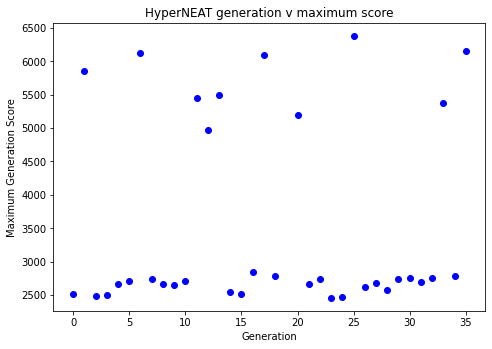

In [14]:
fig = plt.figure()
scatter = fig.add_axes([0,0,1,1])
scatter.scatter(hn['Generation'], hn['Maximum'], color='b')
scatter.set_xlabel('Generation')
scatter.set_ylabel('Maximum Generation Score')
scatter.set_title("HyperNEAT generation v maximum score")

Figure 3: The HyperNEAT data after having the outlier of generation 19 removed.

Text(0.5, 1.0, 'NEAT generation v maximum score')

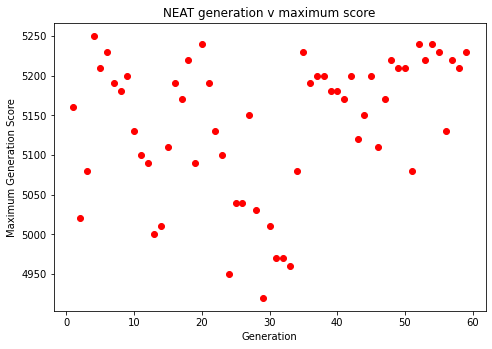

In [15]:
fig = plt.figure()
scatter = fig.add_axes([0,0,1,1])
scatter.scatter(neat['Generation'], neat['Maximum'], color='r')
scatter.set_xlabel('Generation')
scatter.set_ylabel('Maximum Generation Score')
scatter.set_title("NEAT generation v maximum score")

Figure 4: The NEAT data after having the outlier of generation 0 removed.

## Split the NEAT data into training and testing sets

In [16]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(neat["Generation"], 
                                                  neat["Maximum"], 
                                                    test_size = 0.3,
                                                    random_state = 1)

## Split the HyperNEAT data into training and testing sets

In [17]:
X_train_hn, X_test_hn, y_train_hn, y_test_hn = train_test_split(hn["Generation"], 
                                                  hn["Maximum"], 
                                                    test_size = 0.3,
                                                    random_state = 1)

Create the RandomForestRegressor model

In [24]:
forest_n = rfr()
forest_hn = rfr()

Fit the NEAT training data to the NEAT RandomForestRegressor model (*forest_n*)

In [27]:
fitted_forest_n = forest_n.fit(X_train_n.values.reshape(-1,1), y_train_n)

Fit the HyperNEAT training data to the HyperNEAT RandomForestRegressor model (*forest_hn*)

In [28]:
fitted_forest_hn = forest_hn.fit(X_train_hn.values.reshape(-1,1), y_train_hn)